# Capstone: AI Academy
## eMerge Education

We are a team of five Data Scientist who aim to contribute to the reduction of academic dropout rates in higher education. We understand that education is crucial to help people succed. Hence, we have developed a powerful tool for institutions to identify students who are likely to dropout early on, allowing them to implement strategies to help them stay enrolled and thrive.

- Goal: Develop a tool that ensure resource allocation.

> Notebook flow: This jupyter notebook goes as follows, stating each model developed with the appropriate code, and conclusions.

Before we can get going, we'll need to import the relevant packages.

In [2]:
import pandas as pd                                    # Data manipulation and analysis
import numpy as np                                     # Numerical computing
import plotly.express as px                            # High-level interface for interactive visualizations
import seaborn as sns                                  # Higher-level interface for statistical graphics
import matplotlib.pyplot as plt                        # Plotting library for creating various visualizations
from matplotlib.backends.backend_pdf import PdfPages   # Saving multiple figures into a single PDF file
from datetime import datetime                          # Manipulating dates and times
from imblearn.over_sampling import SMOTE               # Synthetic oversampling for imbalanced datasets
from sklearn.linear_model import LogisticRegression    # Logistic Regression model
from sklearn.model_selection import train_test_split   # Splitting data into training and testing sets
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix, classification_report   # Evaluation metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier                                               # Ensemble learning methods
from sklearn import metrics                                                 # Additional evaluation metrics
from sklearn.model_selection import cross_val_score                         # Cross-validation
from sklearn.model_selection import RepeatedStratifiedKFold                 # Repeated stratified K-Fold cross-validation
from sklearn.tree import DecisionTreeClassifier                             # Decision Tree classifier
from sklearn.preprocessing import OneHotEncoder                             # One-hot encoding for categorical variables
from sklearn import tree                                 # Decision Tree-related operations
import warnings                                          # Control display of warning messages
warnings.filterwarnings("ignore")                        # Magic command to display plots inline in Jupyter Notebooks
%matplotlib inline                                      

# Data Understanding

In this notebook, we'll work with `0. data.xlsx` which consist of a dataset with 37 features encompassing student enrollment, academic path, demographics, and social economic factors. 

Data is coming from: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

In [3]:
df = pd.read_csv('0. data.csv')

In [4]:
# Display the first five rows of the DataFrame df.
df.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
# Display the last five rows of the DataFrame df.
df.tail(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,10,1,9773,1,1,152.0,22,38,37,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


According to the dataset providers, extensive data preprocessing was conducted to address anomalies, unexplainable outliers, and missing values. 

In [6]:
# Display concise information about the DataFrame df.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [7]:
# Select column names with float date types.
sel_cols_float = list(df.select_dtypes(include='float'))
sel_cols_float

['Previous qualification (grade)',
 'Admission grade',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (grade)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

In [8]:
# Select column names of object date types.
sel_cols_object = list(df.select_dtypes(include='object'))
sel_cols_object

['Target']

In [9]:
# Display unique values of 'Target' column. 
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

# Data Preparation

In [10]:
# Iterate over each column in the dataset and order its values in an ascendent fashion to see its scale. 

columns_to_iterate = ['Application mode', 'Application order', 'Course', 
                      'Nacionality',"Mother's qualification", "Father's qualification", "Mother's occupation",
                      "Father's occupation"]

for col_name in columns_to_iterate:
        
    # Get the unique values in the column
    unique_values = df[col_name].unique()
        
    # Sort values in ascending order
    unique_values_sorted = sorted(unique_values, reverse=False)

    # Count the number of unique values in a column
    count = df[col_name].nunique()
    
    # Print the column name and its unique values in ascednding order
    print(f"Column: {col_name}")
    print(count)
    print(unique_values_sorted)
    print("\n")

Column: Application mode
18
[1, 2, 5, 7, 10, 15, 16, 17, 18, 26, 27, 39, 42, 43, 44, 51, 53, 57]


Column: Application order
8
[0, 1, 2, 3, 4, 5, 6, 9]


Column: Course
17
[33, 171, 8014, 9003, 9070, 9085, 9119, 9130, 9147, 9238, 9254, 9500, 9556, 9670, 9773, 9853, 9991]


Column: Nacionality
21
[1, 2, 6, 11, 13, 14, 17, 21, 22, 24, 25, 26, 32, 41, 62, 100, 101, 103, 105, 108, 109]


Column: Mother's qualification
29
[1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 14, 18, 19, 22, 26, 27, 29, 30, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]


Column: Father's qualification
34
[1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 18, 19, 20, 22, 25, 26, 27, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]


Column: Mother's occupation
32
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 90, 99, 122, 123, 125, 131, 132, 134, 141, 143, 144, 151, 152, 153, 171, 173, 175, 191, 192, 193, 194]


Column: Father's occupation
46
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 90, 99, 101, 102, 103, 112, 114, 121, 122, 123, 124, 131, 132, 1

As the eaxmple above, it was discovered that all columns containing categorical data are encoded using a non-linear scale. While the reason for this unconventional encoding remains unknown, the meanings of the numbers are now understood. Therefore, we have decided to convert the existing non-linear scale into a linear one to ensure better interpretability and compatibility with the upcoming modeling process.

We must exercise caution when dealing with columns that have non-linear scales and unique values that should remain unchanged. Let's consider two specific examples to illustrate this point.

Firstly, the "grades" column contains numerical results aggregating student grades. It is crucial that we preserve the original values in this column, as any alteration may lead to inaccurate data representation or misinterpretation of academic performance. Therefore, we will refrain from making any changes to this column.

Conversely, we encounter the "father's qualifications" column, which represents the level of education attained by fathers. As previously mentioned, the numerical values associated with specific levels of education in this column do not follow a linear scale. To enhance the interpretability of this data and improve its visual representation, we should consider transforming the scale for this column.

In [11]:
# The code below changes the scale of specific columns that are in need of scale transformation.  
def replace_values_linear_scale(df):
    
    """
    Replace the values in specified columns with a linearly scaled integer value.

    Parameters:
        df (pandas.DataFrame): The input DataFrame.
        columns_to_scale (list): List of column names to scale.
        start_value (int, optional): The starting value for scaling. Default is 1.

    Returns:
        pandas.DataFrame: DataFrame with values in specified columns replaced by linearly scaled integers.
    """

    # Iterate over each column in the dataset
    for col_name in columns_to_iterate:
        
        # Check if the data type of the column is integer
        # if df[col_name].dtype == 'int64':
            
            # Get the unique values in the column
            unique_values = df[col_name].unique()

            # Sort values in ascending order
            unique_values_sorted = sorted(unique_values, reverse=False)

            # Count the number of unique values in a column
            count = df[col_name].nunique()

            # Create a dictionary to store the old value - new value mapping
            value_mapping = {}

            # Generate a new list for values based on linear scaling
            new_values = list(range(1, count + 1))

            # Create a mapping of old values to new values based on the linear scale
            for i, old_val in enumerate(unique_values_sorted):
                new_val = new_values[i]
                value_mapping[old_val] = new_val

            # Replace values in the dataframe using the mapping
            df[col_name] = df[col_name].replace(value_mapping)

replace_values_linear_scale(df)

In [12]:
# Iterate over each column in the dataset and order its values in an ascendent fashion to see its scale. 
for col_name in columns_to_iterate:
        
    # Get the unique values in the column
    unique_values = df[col_name].unique()
        
    # Sort values in ascending order
    unique_values_sorted = sorted(unique_values, reverse=False)

    # Count the number of unique values in a column
    count = df[col_name].nunique()
    
    # Print the column name and its unique values in ascednding order
    print(f"Column: {col_name}")
    print(count)
    print(unique_values_sorted)
    print("\n")

Column: Application mode
18
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


Column: Application order
8
[1, 2, 3, 4, 5, 6, 7, 8]


Column: Course
17
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


Column: Nacionality
21
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


Column: Mother's qualification
29
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


Column: Father's qualification
34
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


Column: Mother's occupation
32
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]


Column: Father's occupation
46
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]




# Exploratory Data Analysis

#### we need to convert the TARGET column to numeric column to help us find the correlation with others

In [13]:
#To view the hoe the Target valuable looks 
df['Target'].unique()


array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [14]:
#we can see the three unique values,we can replace them with 0,1,2
df['Target'] = df['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

In [15]:
# Check Target column, it must have filled with 0, 1 & 2
df['Target'].unique()

array([0, 2, 1], dtype=int64)

We create a copy of df named df1.

In [16]:
df1 = df.copy()

 Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. During EDA, we carefully examine and summarize the main characteristics of our dataset to gain insights, detect patterns, identify potential problems, and formulate hypotheses .describing our data during EDA is fundamental for understanding, cleaning, and preparing the data for analysis. It provides insights into the dataset's characteristics and guides decision-making throughout the data analysis process.

In [17]:
#we need to find out how many dropouts, enrolled  and graduates are there intarget column

In [18]:
df['Target'].value_counts()

2    2209
0    1421
1     794
Name: Target, dtype: int64

#### We want to find the correlation of the Target Variable (Target) with other numeric columns

In [19]:
# Plot the above values
x = df['Target'].value_counts().index
y = df['Target'].value_counts().values

df = pd.DataFrame({
    'Target': x,
    'Count_T' : y
})

fig = px.pie(df,
             names ='Target', 
             values ='Count_T',
            title='How many dropouts, enrolled & graduates are there in Target column')

fig.update_traces(labels=['Graduate','Dropout','Enrolled'], hole=0.4,textinfo='value+label', pull=[0,0.2,0.1])
fig.show()

In [20]:
df1

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,6,2,1,1,122.0,1,13,10,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,2,11,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,6,5,1,1,122.0,1,22,27,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,3,15,1,1,122.0,1,23,27,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,2,3,0,1,100.0,1,22,28,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,7,15,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,1,3,15,1,1,120.0,19,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,2,12,1,1,154.0,1,22,27,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,2,9,1,1,180.0,1,22,27,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


### Let's see the correlation of the target with the rest


In [21]:
df1.corr()['Target'] # We could create a heat map to visualize all the relations more easily

Marital status                                   -0.089804
Application mode                                 -0.212025
Application order                                 0.090008
Course                                            0.007841
Daytime/evening attendance\t                      0.075107
Previous qualification                           -0.056039
Previous qualification (grade)                    0.103764
Nacionality                                      -0.004740
Mother's qualification                           -0.038346
Father's qualification                            0.000329
Mother's occupation                               0.048424
Father's occupation                               0.051702
Admission grade                                   0.120889
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.4098

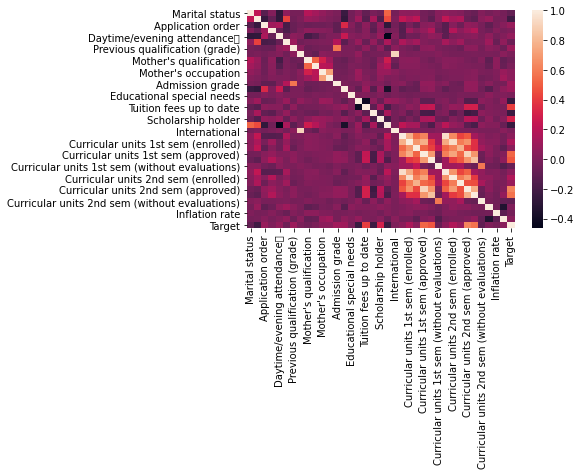

In [22]:
# plotting correlation heatmap
dataplot=sns.heatmap(df1.corr())
  
# displaying heatmap
plt.show()

Tuition fees up to date, curricular unist 1st sem (approved),  unist 1st sem (grade), 
curricular unist 2st sem (approved),  unist 2st sem (grade), 

##### Let's plot the column Curricular units 2nd sem (approved) againt Curricular units 1st sem (approved) and differentiate Target by color

In [23]:
fig = px.scatter(df1, 
             x = 'Curricular units 1st sem (approved)',
             y = 'Curricular units 2nd sem (approved)',
             color = 'Target')
fig.show()

In [24]:
fig = px.histogram(df1, 
             x = 'Curricular units 1st sem (enrolled)',
             y = 'Curricular units 2nd sem (enrolled)',
             color = 'Target')
fig.show()

In [25]:
fig = px.histogram(df1, y='Age at enrollment')
fig.show()

<AxesSubplot:xlabel='Age at enrollment', ylabel='Count'>

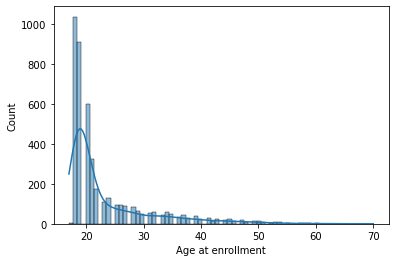

In [26]:
# Distribution of age of students at the time of enrollment
sns.histplot(data=df1['Age at enrollment'], kde=True)

Given that our dataset covers an entire year of college, we can consider students who remained enrolled as graduates, as both categories essentially denote the same status. Therefore, next step is to combine "enrolled" class and "graduated" class as a single class. 

In [27]:
df1['Target'].value_counts()

2    2209
0    1421
1     794
Name: Target, dtype: int64

In [28]:
# Define the mapping of old values to new values
value_mapping = {
    1: 2
}

# Replace the old values with new values in the specified column
df1['Target'].replace(value_mapping, inplace=True)

In [29]:
df1['Target'].value_counts()

2    3003
0    1421
Name: Target, dtype: int64

### Next step is to Hot-Encode

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [31]:
# Get the list of column names
column_names = df1.columns.tolist()
print(column_names)

['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']


In [32]:
df1['International'].unique()

array([0, 1], dtype=int64)

In [33]:
# Perform one-hot encoding on the categorical columns (Category1 and Category2)
df1_encoded = pd.get_dummies(df1, columns=['Marital status', 'Application mode', 'Application order', 
                                           'Course', 'Daytime/evening attendance\t', 'Previous qualification',
                                           'Nacionality', "Mother's qualification", "Father's qualification", 
                                           "Mother's occupation", "Father's occupation",'Displaced', 
                                           'Educational special needs', 'Debtor', 'Tuition fees up to date', 
                                           'Gender', 'Scholarship holder', 'Age at enrollment', 'International'
                                          ])

df1_encoded.shape

(4424, 308)

In [34]:
df1_encoded.columns

Index(['Previous qualification (grade)', 'Admission grade',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       ...
       'Age at enrollment_55', 'Age at enrollment_57', 'Age at enrollment_58',
       'Age at enrollment_59', 'Age at enrollment_60', 'Age at enrollment_61',
       'Age at enrollment_62', 'Age at enrollment_70', 'International_0',
       'International_1'],
      dtype='object', length=308)

# Modeling

### Create training and test sets

Before we do anything we'll want to split our data into **_training_** and **_test_** sets.  We'll accomplish this by first splitting the DataFrame into features (`X`) and target (`y`), then passing `X` and `y` to the `train_test_split()` function to split the data so that 70% of it is in the training set, and 30% of it is in the testing set.

In [35]:
X = df1.drop('Target', axis=1)  # Excluding the target column
y = df1['Target']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

In [36]:
features_list = X.columns.tolist()
class_list = np.unique(y).astype('str').tolist()

## Model 1: Decision Tree Clasiffier  

We'll first create an instance of the classifier with any parameter values we have, and then we'll fit our data to the model using `.fit()`. due to our inbalanced dataset we are going to use 'gini' as the criterion metric.

In [37]:
# Create the classifier:
SEED = 0
clf = DecisionTreeClassifier(criterion='entropy', random_state = SEED)

# fit it on the training data 
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Plot the vanilla decision tree

You can see what rules the tree learned by plotting this decision tree, using matplotlib and sklearn's `plot_tree` function. Sadly, this is a complex grapgh to visualize but the idea was to plot it and gain a general idea. 

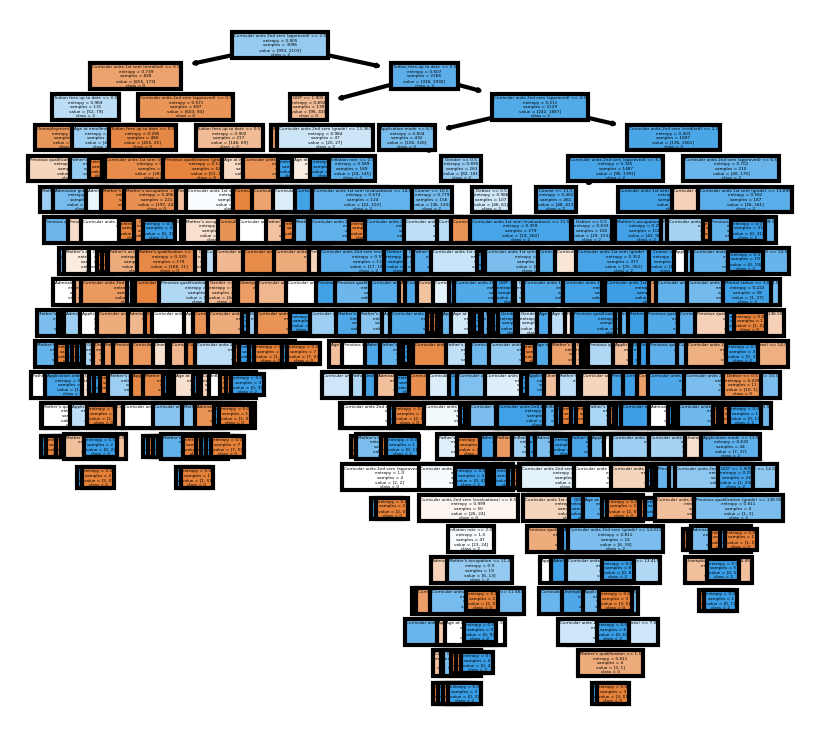

In [38]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(clf,
               feature_names = features_list, 
               class_names=class_list,
               filled = True)
plt.show()

In [39]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_30 <= 2.50
|   |--- feature_22 <= 0.50
|   |   |--- feature_16 <= 0.50
|   |   |   |--- feature_33 <= 11.75
|   |   |   |   |--- class: 0
|   |   |   |--- feature_33 >  11.75
|   |   |   |   |--- feature_6 <= 133.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  133.50
|   |   |   |   |   |--- feature_8 <= 13.00
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_8 >  13.00
|   |   |   |   |   |   |--- class: 0
|   |   |--- feature_16 >  0.50
|   |   |   |--- feature_19 <= 25.50
|   |   |   |   |--- feature_11 <= 9.50
|   |   |   |   |   |--- feature_12 <= 116.35
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_12 >  116.35
|   |   |   |   |   |   |--- feature_6 <= 157.50
|   |   |   |   |   |   |   |--- feature_35 <= 1.90
|   |   |   |   |   |   |   |   |--- feature_35 <= -0.30
|   |   |   |   |   |   |   |   |   |--- feature_8 <= 17.50
|   |   |   |   |   |   |   |   |   |   |--- feature_8 <= 1.50
|   |   |   

### Make predictions and evaluate vanilla model

Now we´ll create a set of predictions using test set and use `y_test` and `y_pred`, calculate the AUC (Area under the curve) to check the predictive performance.

In [40]:
# Make predictions on the test set:
y_pred = clf.predict(X_test)

# Check the AUC of predictions
positive_label = 2
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label=positive_label)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 4)))

# Get accurace for the vanilla model:
print('Accuracy: ', accuracy_score(y_test, y_pred))


AUC is :0.7725
Accuracy:  0.8012048192771084


### Tree prunning

As you probably know, Decision Trees have parameters that determine the learning rate of the algorithm. By tweaking these parameters, we can optimize the classifier for better performance.

Firstly, we'll determine the best `max-depth parameter` for our decision tree. Next, we'll search for the optimal `min_samples_splits` parameter, and finally, we'll evaluate the best `min_samples_leaf` parameter value for our decision tree.

### Tree prunning: max-depth parameter

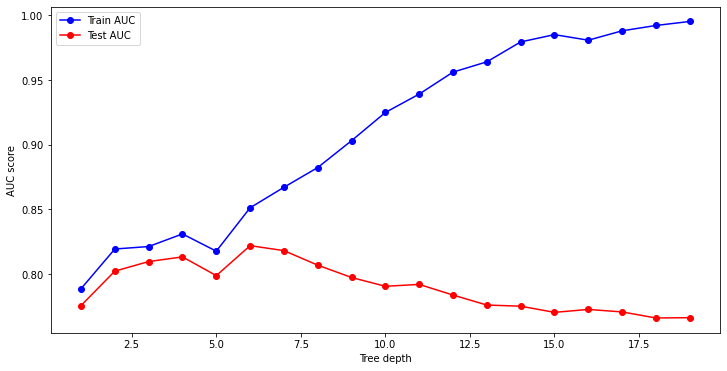

In [41]:
# Identify the optimal tree depth for given data
max_depths = list(range(1, 20))
train_results = []
test_results = []

for value in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=value, random_state=SEED)
    dt.fit(X_train, y_train)
    
    #Train AUC
    positive_label = 2
    train_pred = dt.predict(X_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred, pos_label=positive_label)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    #Add Train AUC to previous result
    train_results.append(roc_auc)
    
    #Test AUC
    positive_label = 2
    test_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_pred, pos_label=positive_label)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    #Add Test AUC to previous result
    test_results.append(roc_auc)
    
plt.figure(figsize = (12, 6))
plt.plot(max_depths, train_results, 'b', label = 'Train AUC', marker='o')  
plt.plot(max_depths, test_results, 'r', label = 'Test AUC', marker='o')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend() # Add legends to grapgh
plt.show();

## Intepretation 

As we increase max_depth from 1 to 6, the model's complexity increases, and both training and test scores improve. The model starts to capture more patterns and generalizes better to unseen data. As max_depth increases from 8 to 20, the training score continues to improve, reaching near-perfect accuracy. However, the test score decreases, indicating that the model is overfitting to the training data and performs poorly on new, unseen data. At max_depth 6, the test score reaches its peak, indicating the best balance between model complexity and generalization. 

The optimal value for max_depth appears to be 6 in this case, where the test score is maximized without overfitting.

### Tree prunning: min-samples-split

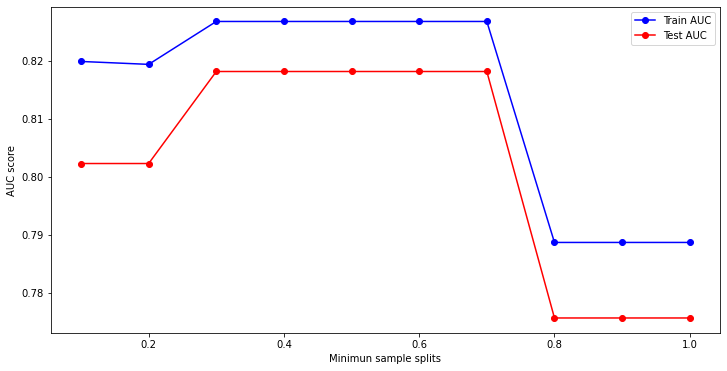

In [42]:
# Identify the optimal min-samples-split for given data
min_sample_splits = np.linspace(0.1, 1, 10, endpoint = True)
train_results = []
test_results = []

for value in min_sample_splits:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=value, random_state=SEED)
    dt.fit(X_train, y_train)
    
    #Train AUC
    positive_label = 2
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred, pos_label=positive_label)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    #Add Train AUC to previous result
    train_results.append(roc_auc)
    
    #Test AUC
    positive_label = 2
    test_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_pred, pos_label=positive_label)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    #Add Test AUC to previous result
    test_results.append(roc_auc)
    
plt.figure(figsize = (12, 6))
plt.plot(min_sample_splits, train_results, 'b', label = 'Train AUC', marker = 'o')  
plt.plot(min_sample_splits, test_results, 'r', label = 'Test AUC', marker = 'o')
plt.ylabel('AUC score')
plt.xlabel('Minimun sample splits')
plt.legend() # Add legends to grapgh
plt.show();

## Interpretation

As min-samples-split increase from 0.1 to 0.3, the model's complexity increases, and both training and test scores improve. When min-samples-split increase from 0.3 to 0.7 both test and train data stabilizes. Further increase casue both scores to decrease drastically.  

The optimal value for min-samples-split appears to be 0.3 in this case, where the test score is maximized without overfitting.

### Tree prunning: minimum sample leafs

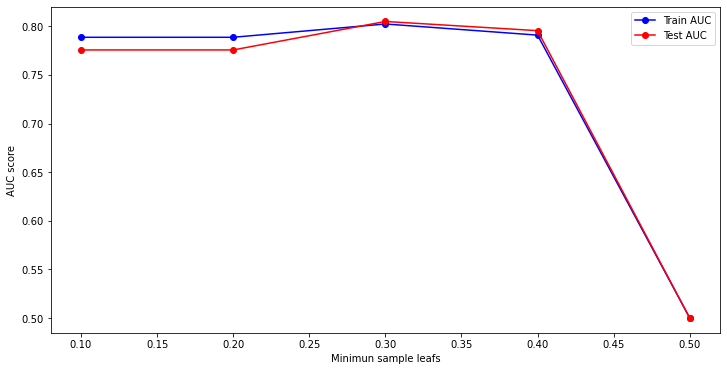

In [43]:
# Calculate the optimal value for minimum sample leafs
min_sample_leafs = np.linspace(0.1, 0.5, 5, endpoint = True)
train_results = []
test_results = []
positive_label = 2

for value in min_sample_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=value, random_state=SEED)
    dt.fit(X_train, y_train)
    
    #Train AUC
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred, pos_label=positive_label)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    #Add Train AUC to previous result
    train_results.append(roc_auc)
    
    #Test AUC
    test_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_pred, pos_label=positive_label)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    #Add Test AUC to previous result
    test_results.append(roc_auc)
    
plt.figure(figsize = (12, 6))
plt.plot(min_sample_leafs, train_results, 'b', label = 'Train AUC', marker = 'o')  
plt.plot(min_sample_leafs, test_results, 'r', label = 'Test AUC', marker = 'o')
plt.ylabel('AUC score')
plt.xlabel('Minimun sample leafs')
plt.legend() # Add legends to grapgh
plt.show();

## Interpretation

As we icnrease the value for minimum sample leafs from 0.1 to 0.4, the model's complexity increases, and both training and test scores improve. Further increase increase casue both scores to decrease drastically.  

As max_depth increases from 8 to 20, the training score continues to improve, reaching near-perfect accuracy. However, the test score decreases, indicating that the model is overfitting to the training data and performs poorly on new, unseen data.

At a value for minimum sample leafs of 0.3, the test score reaches its peak, and gets slightly higher than train score indicating a better between model complexity and generalization  with test data than the train process itself. 

The optimal value for min-samples-split appears to be around 0.25 in this case, where the test score is maximized.

### Re-train the classifier with chosen values

Now we will use the best values from each training phase above and feed it back to our classifier. Then we can see if there is any improvement in predictive performance.

In [44]:
# Train a classifier with optimal values identified above
dt = DecisionTreeClassifier(criterion='entropy', 
                            random_state=SEED, 
                            max_depth = 6,
                            min_samples_split = 0.7, 
                            min_samples_leaf = 0.20, 
                            #max_features = 6
                           )
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Check the AUC of predictions
positive_label = 2
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label=positive_label)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 4)))

# Get accurace for the vanilla model:
print('Accuracy: ', accuracy_score(y_test, y_pred))


AUC is :0.7756
Accuracy:  0.8237951807228916


Upon analyzing the results, it is evident that the AUC of the current model is slightly worse compared to our vanilla model. However, in contrast, the Accuracy Score shows a slight improvement.

It is essential to note that we did not take into account the interaction between parameters, which implies that our model can still be further optimized through a Grid Search. This search will enable us to find the appropriate combination of parameters to optimize our model.

## GrisSearch (optimal parameters)

Now, we will utilize the optimal values obtained from each training phase mentioned above and input them into our classifier. Subsequently, we can evaluate whether there is any enhancement in predictive performance.

In [45]:
from sklearn.model_selection import GridSearchCV, KFold

In [46]:
def dtree_grid_search(X,y,nfolds):
    
    #create a dictionary of all values we want to test
    # param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'random_state': [0],  # Changed to a list
        'max_depth': [2, 4, 6, 8, 10],  # Changed to a list
        'min_samples_split': [0.1, 0.3, 0.5, 0.7, 0.9],  # Changed to a list
        'min_samples_leaf' : [0.1, 0.2, 0.3, 0.4, 0.5],  # Changed to a list
    }
    
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    
    #fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

In [47]:
dtree_grid_search(X_train, y_train,5)

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'random_state': 0}

### Re-train the classifier with chosen values

Again, we will use the best values from the step above and feed it back to our classifier. Then we can see if there is any improvement in predictive performance.

In [48]:
# Train a classifier with optimal values identified above
dt = DecisionTreeClassifier(criterion='gini', 
                            random_state=SEED, 
                            max_depth = 2,
                            min_samples_split = 0.1, 
                            min_samples_leaf = 0.1
                           )
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Check the AUC of predictions
positive_label = 2
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label=positive_label)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 4)))

# Get accurace for the vanilla model:
print('Accuracy: ', accuracy_score(y_test, y_pred))


AUC is :0.7756
Accuracy:  0.8237951807228916


Despite obtaining the same result as before, we have decided to stick with this model and designate it as our best, or at the very least, an adequate Decision Tree Classifier model based on the data we have.

### Visualize Confusion Matrix

Confusion Matrix:
[[274 154]
 [ 80 820]]


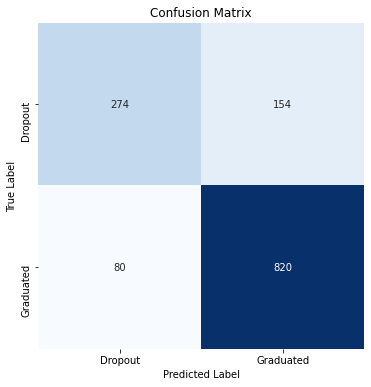

In [49]:

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
# Define the mapping of class labels
class_labels = {0: 'Dropout', 1: 'Graduated'}

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Modeling: Pipeline Set-up

In [50]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

categorical_pipeline = Pipeline(
    steps=[
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("oh-encode", OneHotEncoder(handle_unknown="ignore", sparse=False)),
    ]
)

In [51]:
from sklearn.preprocessing import StandardScaler

numeric_pipeline = Pipeline(
    steps=[("impute", SimpleImputer(strategy="mean")), 
           ("scale", StandardScaler())]
)

In [52]:
cat_cols = X.select_dtypes(exclude="number").columns
num_cols = X.select_dtypes(include="number").columns

In [53]:
from sklearn.compose import ColumnTransformer

full_processor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_pipeline, num_cols),
        ("categorical", categorical_pipeline, cat_cols),
    ]
)

In [54]:
# Apply preprocessing
X_processed = full_processor.fit_transform(X)
y_processed = SimpleImputer(strategy="most_frequent").fit_transform(
    y.values.reshape(-1, 1)
)



In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, stratify=y_processed, random_state=1121218)


In [56]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold



## Model 2: Naive Bayes Model


Naive Bayes falls within the category of supervised learning algorithms known as Bayesian Classification. Employing probability for its predictive analysis, given that our target is dichotomous variable, using Bernoulli Naive Bayes for a target variable with two classes can be a good idea for several reasons. Bernoulli Naive Bayes is a variant of the Naive Bayes algorithm that is specifically designed for binary classification tasks, where the target variable has only two classes (e.g., yes/no, true/false, positive/negative). It also has a low overfitting risk.

In [57]:
# importing classifier
from sklearn.naive_bayes import BernoulliNB

# initializaing the NB
bayes = BernoulliNB()


In [58]:
# training the model
bayes.fit(X_train, y_train)

BernoulliNB()

In [59]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, confusion_matrix, ConfusionMatrixDisplay

#We can evaluate using cross-validation
y_pred = cross_val_predict(bayes,X_test,y_test,cv=10)
##y_pred = bayes.predict(X_test)
accuracy_score(y_test, y_pred)

0.8282097649186256

## Model 3: Histogram-based Gradient Boosting Classification Tree


Histogram-based gradient boosting is a technique employed in the training of quicker decision trees within the gradient boosting ensemble. This a model that requires a lot of effort while training, but since our dataset is not that big, it will not be a problem. Since we have a Classification type dataset, it is interesting to see the results with this model since it applies gradient boosting combined with decision trees while binning the data.



In [60]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [61]:
HGB = HistGradientBoostingClassifier(random_state=42)


Basically, the model is binning the data and passing it to the tree when splitting. Anyhow, we do not need to worry for missing values, eventhough the dataset is already cleaned with imputed values.

We can start by experimenting with the model with random hyperparameters, and then try prunning until we get better results.

In [64]:
hgb_clf = HistGradientBoostingClassifier(loss='binary_crossentropy',   
                                        learning_rate=0.1,          # regulates the contribution of each tree
                                        max_iter=150,               
                                        min_samples_leaf=15,
                                        max_depth=None,
                                        random_state=None,
                                        max_leaf_nodes=35           
                                        )

In [65]:
hgb_clf.fit(X_train, y_train)
hgb_preds = hgb_clf.predict(X_test)
accuracy_score(y_test, hgb_preds)


0.8625678119349005

#### Prunning the Histogram-based Gradient Boosting Classification Tree

We can start by adding an evaluation procedure to our model. We will use Grid Search technique.

In [66]:
from sklearn.model_selection import GridSearchCV, KFold

We will find the best value for our max iterations and evaluate with cross validation.

In [67]:
param_grid = {
    "learning_rate": (0.01, 0.1, 1, 10,100),
    "max_leaf_nodes": (3, 10, 30,40),
    "max_iter": (10, 20, 50, 100, 300, 500),
}


In [68]:
model_grid_search = GridSearchCV(HGB, param_grid=param_grid, n_jobs=2, cv=2)
model_grid_search.fit(X_train, y_train) 

GridSearchCV(cv=2, estimator=HistGradientBoostingClassifier(random_state=42),
             n_jobs=2,
             param_grid={'learning_rate': (0.01, 0.1, 1, 10, 100),
                         'max_iter': (10, 20, 50, 100, 300, 500),
                         'max_leaf_nodes': (3, 10, 30, 40)})

In [69]:

accuracy = model_grid_search.score(X_test, y_test)
print(
    f"Accuracy score of the grid-search pipeline is of: {accuracy:.2f}"
)

Accuracy score of the grid-search pipeline is of: 0.87


We should be careful with this accuracy, it would be better to apply a nested cross validation to evaluate our grid search, and then our model.

In [70]:
print(f"The best set of parameters is: {model_grid_search.best_params_}")


The best set of parameters is: {'learning_rate': 0.01, 'max_iter': 500, 'max_leaf_nodes': 10}


In [93]:
hgb_clf_tuned = HistGradientBoostingClassifier(loss='binary_crossentropy',   
                                        learning_rate=0.01,          #apply the best parameters to our model
                                        max_iter=500,               
                                        min_samples_leaf=15,
                                        max_depth=None,
                                        random_state=None,
                                        max_leaf_nodes=10           
                                        )

In [94]:
hgb_clf_tuned.fit(X_train, y_train)
hgb_tuned_preds = hgb_clf_tuned.predict(X_test)
accuracy_score(y_test, hgb_tuned_preds)

0.8761301989150091

In [73]:
model_grid_search.predict(X_test[0:5])


array([2, 2, 2, 0, 2], dtype=int64)

In [74]:
models=[
        ("HGB", HistGradientBoostingClassifier()),
        ("Bernoulli Naive Bayes", BernoulliNB())]

for name, model in models:
    kfold = KFold(n_splits=10)
    results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    print(f"\x1b[96m{name}\x1b[0m: \x1b[95m{results.mean():.4f}\x1b[0m ± {results.std():.4f}")

HGB: 0.8746 ± 0.0115
Bernoulli Naive Bayes: 0.8291 ± 0.0256


Let's evaluate the behavior with other parameters

In [75]:

cv_results = pd.DataFrame(model_grid_search.cv_results_).sort_values(
    "mean_test_score", ascending=False
)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_iter,param_max_leaf_nodes,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
21,3.088260,0.001152,0.052194,0.012200,0.01,500,10,"{'learning_rate': 0.01, 'max_iter': 500, 'max_...",0.875829,0.869801,0.872815,0.003014,1
33,0.213015,0.000059,0.005174,0.001191,0.1,50,10,"{'learning_rate': 0.1, 'max_iter': 50, 'max_le...",0.875829,0.867993,0.871911,0.003918,2
23,7.973522,0.071261,0.057649,0.002283,0.01,500,40,"{'learning_rate': 0.01, 'max_iter': 500, 'max_...",0.875829,0.866184,0.871007,0.004822,3
40,0.353663,0.025011,0.013830,0.000261,0.1,300,3,"{'learning_rate': 0.1, 'max_iter': 300, 'max_l...",0.875829,0.866184,0.871007,0.004822,3
37,0.405540,0.002651,0.005607,0.000606,0.1,100,10,"{'learning_rate': 0.1, 'max_iter': 100, 'max_l...",0.871007,0.869198,0.870102,0.000904,5


In [76]:

#Now we are getting the parameters names
column_results = [f"param_{name}" for name in param_grid.keys()]
column_results += [
    "mean_test_score", "std_test_score", "rank_test_score"]
cv_results = cv_results[column_results]

In [77]:
def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name


cv_results = cv_results.rename(shorten_param, axis=1)
cv_results

,param_learning_rate,param_max_leaf_nodes,param_max_iter,mean_test_score,std_test_score,rank_test_score
21,0.01,10,500,0.872815,0.003014,1
33,0.1,10,50,0.871911,0.003918,2
23,0.01,40,500,0.871007,0.004822,3
40,0.1,3,300,0.871007,0.004822,3
37,0.1,10,100,0.870102,0.000904,5
...,...,...,...,...,...,...
72,10,3,10,0.200121,0.030139,115
92,10,3,500,0.200121,0.030139,115
76,10,3,20,0.200121,0.030139,115
88,10,3,300,0.200121,0.030139,115


In [78]:

pivoted_cv_results = cv_results.pivot_table(
    values="mean_test_score",
    index=["param_learning_rate"],
    columns=["param_max_leaf_nodes"],
)

pivoted_cv_results

param_max_leaf_nodes,3,10,30,40
param_learning_rate,,,,
0.01,0.784509,0.799277,0.798925,0.798272
0.10,0.861111,0.866687,0.865632,0.865481
1.00,0.851015,0.844233,0.852672,0.851869
10.00,0.200121,0.264919,0.727547,0.708559
100.00,0.839361,0.598252,0.333635,0.333032


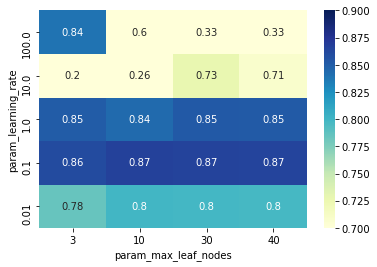

In [79]:

import seaborn as sns

ax = sns.heatmap(
    pivoted_cv_results, annot=True, cmap="YlGnBu", vmin=0.7, vmax=0.9
)
ax.invert_yaxis()

When we have a higher value in the learning rate parameter our model basically gets an accuracy of most of our baseline model, even while using hyperparameter. It is interesting to see that this accuracy decreases exponencially if both learning rate and max_leaf_nodes are high, giving an accuracy of just 33%. But then, when we have a learning rate of just 0.1, then the change in the hyperparameter of max_leaf_nodes does not really make a difference, event though it increases.



## Model 4: Neural Network

First, we need to identify the number of features that our current database has, in order to know the size of our output layer for the neural network.

In [80]:
# How big input layer?
n_features = (X_train.shape[1],)
print(n_features)

(36,)


Let's start by building a baseline model using Sequential() with two hidden layers. Since we do not have a validation set, let's make a val_set out of our training set.

In [81]:
from sklearn.model_selection import train_test_split
X_pure_train, X_val, y_pure_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.5)

In [82]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [83]:
from keras.models import Sequential
from keras import initializers
from keras import layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#Baseline model
np.random.seed(123)
baseline_model = Sequential()

# Hidden layer with 100 units
baseline_model.add(layers.Dense(50, activation='relu', input_shape=(n_features)))

# Hidden layer with 50 units
baseline_model.add(layers.Dense(50, activation='softmax'))

# Output layer
baseline_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
baseline_model.compile(optimizer='adam', 
                       loss='binary_crossentropy', 
                       metrics=['accuracy'])

# Train the model
baseline_model.fit(X_train, 
                   y_train, 
                   batch_size=32, 
                   epochs=120, 
                   validation_data=(X_val, y_val))


Epoch 1/120
104/104 [==============================] - 0s 3ms/step - loss: 0.4858 - accuracy: 0.0015 - val_loss: 0.2639 - val_accuracy: 0.0000e+00
Epoch 2/120
104/104 [==============================] - 0s 1ms/step - loss: 0.1232 - accuracy: 0.0000e+00 - val_loss: -0.0059 - val_accuracy: 6.0277e-04
Epoch 3/120
104/104 [==============================] - 0s 1ms/step - loss: -0.1053 - accuracy: 0.0805 - val_loss: -0.2094 - val_accuracy: 0.1332
Epoch 4/120
104/104 [==============================] - 0s 1ms/step - loss: -0.2877 - accuracy: 0.1552 - val_loss: -0.3770 - val_accuracy: 0.1676
Epoch 5/120
104/104 [==============================] - 0s 1ms/step - loss: -0.4460 - accuracy: 0.1715 - val_loss: -0.5298 - val_accuracy: 0.1760
Epoch 6/120
104/104 [==============================] - 0s 1ms/step - loss: -0.5907 - accuracy: 0.1790 - val_loss: -0.6720 - val_accuracy: 0.1718
Epoch 7/120
104/104 [==============================] - 0s 1ms/step - loss: -0.7280 - accuracy: 0.1814 - val_loss: -0.8062

In [84]:
# Evaluate the model on training data 
baseline_model.evaluate(X_train, y_train)

  1/104 [..............................] - ETA: 0s - loss: -13.6945 - accuracy: 0.1875

104/104 [==============================] - 0s 1ms/step - loss: -14.8615 - accuracy: 0.2381


[-14.86148452758789, 0.2380952388048172]

In [85]:
#Now evaluate on validation set
baseline_model.evaluate(X_val, y_val)


52/52 [==============================] - 0s 676us/step - loss: -14.8760 - accuracy: 0.2357


[-14.875967025756836, 0.23568414151668549]

The final finding with this model a "Neural Network" is that they typically perform well on complex and large-scale datasets because they are capable of learning intricate patterns and representations from the data. However, they may struggle with low-complexity datasets like in this case. We only see an accuracy of 24%. Nothing compared like previous models! It lacks of feature engineering and lacks of representative features given the size of our dataset. The conclusion here is that the solution doesn not always need to be a very complex model such as a neural network.

## Model 5: XGBoost

XGBoost is a robust machine-learning algorithm that can help you understand your data and make better decisions.

XGBoost is an implementation of gradient-boosting decision trees. It has been used by data scientists and researchers worldwide to optimize their machine-learning models.

First we need to import XGBoost

In [86]:
import xgboost as xgb
from xgboost import plot_importance

Now we are going to create an instance of the xgboost model, fit it an train it

In [87]:
# Init classifier
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

It's time to see the accuracy of our model

In [88]:
# Score
accuracy_score(y_test, preds)

0.8670886075949367

In addition to the score it's good to also know which features have a bigger impact for the prediction of our model, so we are going to make use of the plt_importance module to see this

First we create a dictionary with our features to be able to see the name of the features on our graph

In [89]:
myfeatures = X.columns
dict_features = dict(enumerate(myfeatures))

Now we create our plot

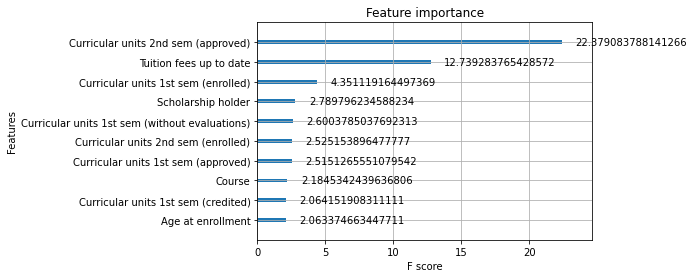

In [90]:
# feat importance with names f1,f2,...
axsub = xgb.plot_importance(xgb_cl, max_num_features=10, importance_type ='gain')

# get the original names back
Text_yticklabels = list(axsub.get_yticklabels())
lst_yticklabels = [ Text_yticklabels[i].get_text().lstrip('f') for i in range(len(Text_yticklabels))]
lst_yticklabels = [ dict_features[int(i)] for i in lst_yticklabels]

axsub.set_yticklabels(lst_yticklabels)
plt.show()

With this we can give another insight to the reasons why a student drops out and help prevent these cases.

### Visualize Confusion Matrix

Confusion Matrix:
[[259  96]
 [ 51 700]]


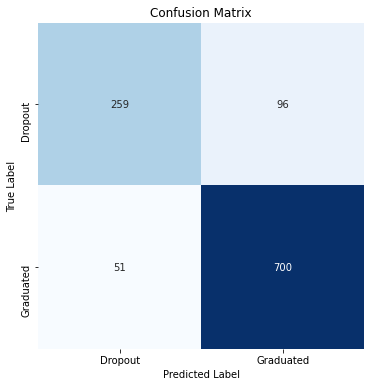

In [91]:
# Print the confusion matrix
cm = confusion_matrix(y_test, preds)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
# Define the mapping of class labels
class_labels = {0: 'Dropout', 1: 'Graduated'}

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Conclusions

> Upon examining our models, it became evident that XGBoost offers several advantages, with the most significant being its lower complexity. While Histogram Gradient Boosting achieved a marginally better accuracy, it came at the cost of higher complexity in terms of model structure and interpretability. The XGBoost model, on the other hand, provided comparable accuracy with much simpler and more transparent rules, making it easier to comprehend and maintain in production.